# Importing the necessary packages

In [71]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings("ignore")

In [72]:
df_ff = pd.read_csv('forestfires.csv')

In [73]:
df_ff.head()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small


In [74]:
df_ff.shape

(517, 31)

In [75]:
df_ff.describe()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,...,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,12.847292,0.164410,...,0.017408,0.038685,0.003868,0.061896,0.032882,0.104449,0.003868,0.001934,0.029014,0.332689
std,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,63.655818,0.371006,...,0.130913,0.193029,0.062137,0.241199,0.178500,0.306138,0.062137,0.043980,0.168007,0.471632
min,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,6.570000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [76]:
df_ff.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 31 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   month          517 non-null    object 
 1   day            517 non-null    object 
 2   FFMC           517 non-null    float64
 3   DMC            517 non-null    float64
 4   DC             517 non-null    float64
 5   ISI            517 non-null    float64
 6   temp           517 non-null    float64
 7   RH             517 non-null    int64  
 8   wind           517 non-null    float64
 9   rain           517 non-null    float64
 10  area           517 non-null    float64
 11  dayfri         517 non-null    int64  
 12  daymon         517 non-null    int64  
 13  daysat         517 non-null    int64  
 14  daysun         517 non-null    int64  
 15  daythu         517 non-null    int64  
 16  daytue         517 non-null    int64  
 17  daywed         517 non-null    int64  
 18  monthapr  

In [77]:
df_ff.isna().sum()

month            0
day              0
FFMC             0
DMC              0
DC               0
ISI              0
temp             0
RH               0
wind             0
rain             0
area             0
dayfri           0
daymon           0
daysat           0
daysun           0
daythu           0
daytue           0
daywed           0
monthapr         0
monthaug         0
monthdec         0
monthfeb         0
monthjan         0
monthjul         0
monthjun         0
monthmar         0
monthmay         0
monthnov         0
monthoct         0
monthsep         0
size_category    0
dtype: int64

## Droping the columns

In [78]:
df_ff = df_ff.drop(['dayfri', 'daymon', 'daysat', 'daysun', 'daythu','daytue', 'daywed', 'monthapr', 
                                      'monthaug', 'monthdec', 'monthfeb','monthjan', 'monthjul', 'monthjun', 'monthmar',
                                      'monthmay', 'monthnov','monthoct','monthsep'], axis = 1)
df_ff

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00,small
...,...,...,...,...,...,...,...,...,...,...,...,...
512,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44,large
513,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29,large
514,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16,large
515,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00,small


In [79]:
df_ff.size_category.value_counts()

small    378
large    139
Name: size_category, dtype: int64

Text(0.5, 1.0, 'HeatMap of Features for the Classes')

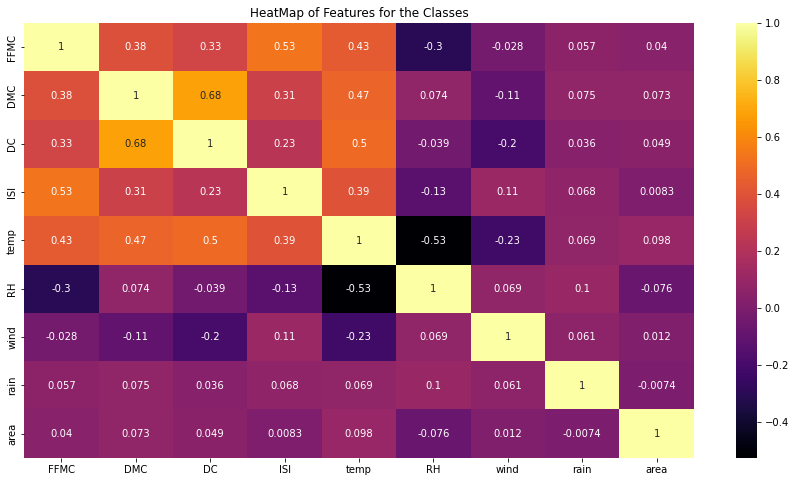

In [80]:
fig, ax = plt.subplots(figsize=(15, 8))
sns.heatmap(df_ff.corr(), annot=True, cmap="inferno")
ax = plt.gca()
ax.set_title("HeatMap of Features for the Classes")

## Encode 'month' and 'day' columns

In [81]:
df_ff.month.replace(('jan','feb','mar','apr','may','jun','jul','aug','sep','oct','nov','dec'),
                                                           (1,2,3,4,5,6,7,8,9,10,11,12), inplace=True)
df_ff.day.replace(('mon','tue','wed','thu','fri','sat','sun'),(1,2,3,4,5,6,7), inplace=True)
df_ff.head()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,size_category
0,3,5,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0,small
1,10,2,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0,small
2,10,6,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0,small
3,3,5,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0,small
4,3,7,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0,small


## Encoding the target variable 'size category'

In [82]:
df_ff.size_category.replace(('small', 'large'), (0, 1), inplace = True)
df_ff.sample(20)

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,size_category
224,9,3,90.1,82.9,735.7,6.2,15.4,57,4.5,0.0,37.71,1
100,8,7,91.4,142.4,601.4,10.6,19.8,39,5.4,0.0,0.00,0
12,8,5,63.5,70.8,665.3,0.8,17.0,72,6.7,0.0,0.00,0
154,9,6,93.4,145.4,721.4,8.1,29.6,27,2.7,0.0,1.46,0
275,12,4,84.6,26.4,352.0,2.0,5.1,61,4.9,0.0,5.38,0
49,3,1,87.6,52.2,103.8,5.0,11.0,46,5.8,0.0,0.00,0
16,3,6,91.7,35.8,80.8,7.8,15.1,27,5.4,0.0,0.00,0
280,12,5,84.7,26.7,352.6,4.1,2.2,59,4.9,0.0,9.27,1
428,8,4,94.8,222.4,698.6,13.9,26.2,34,5.8,0.0,0.00,0
397,8,7,91.6,181.3,613.0,7.6,24.3,33,3.6,0.0,3.63,0


## Standardize the data

In [83]:
scaler = StandardScaler()
scaler.fit(df_ff.drop('size_category', axis=1))

StandardScaler()

In [84]:
scaled_features = scaler.transform(df_ff.drop('size_category', axis=1))
df_head = pd.DataFrame(scaled_features, columns=df_ff.columns[:-1])
df_head

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,-1.968443,0.357721,-0.805959,-1.323326,-1.830477,-0.860946,-1.842640,0.411724,1.498614,-0.073268,-0.202020
1,1.110120,-1.090909,-0.008102,-1.179541,0.488891,-0.509688,-0.153278,-0.692456,-1.741756,-0.073268,-0.202020
2,1.110120,0.840597,-0.008102,-1.049822,0.560715,-0.509688,-0.739383,-0.692456,-1.518282,-0.073268,-0.202020
3,-1.968443,0.357721,0.191362,-1.212361,-1.898266,-0.004756,-1.825402,3.233519,-0.009834,0.603155,-0.202020
4,-1.968443,1.323474,-0.243833,-0.931043,-1.798600,0.126966,-1.291012,3.356206,-1.238940,-0.073268,-0.202020
...,...,...,...,...,...,...,...,...,...,...,...
512,0.230531,1.323474,-1.640083,-0.846648,0.474768,-1.563460,1.536084,-0.753800,-0.736124,-0.073268,-0.100753
513,0.230531,1.323474,-1.640083,-0.846648,0.474768,-1.563460,0.519019,1.638592,0.995798,-0.073268,0.651674
514,0.230531,1.323474,-1.640083,-0.846648,0.474768,-1.563460,0.398350,1.577248,1.498614,-0.073268,-0.026532
515,0.230531,0.840597,0.680957,0.549003,0.269382,0.500176,1.156839,-0.140366,-0.009834,-0.073268,-0.202020


# Split the data into test and train data

In [85]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(df_head, df_ff['size_category'], test_size=0.3, random_state=40)

In [86]:
print('Shape of x_train: ', x_train.shape)
print('Shape of x_test: ', x_test.shape)
print('Shape of y_train: ', y_train.shape)
print('Shape of y_test: ', y_test.shape)

Shape of x_train:  (361, 11)
Shape of x_test:  (156, 11)
Shape of y_train:  (361,)
Shape of y_test:  (156,)


# ANN Model - Backpropagation

In [87]:
from keras.models import Sequential
from keras.layers import Dense

## Create model

In [88]:
model = Sequential()
model.add(Dense(12, input_dim=11, kernel_initializer='uniform', activation='relu'))
model.add(Dense(10, kernel_initializer='uniform', activation='relu'))
model.add(Dense(1, kernel_initializer='uniform', activation='sigmoid'))

## Compile model

In [89]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [90]:
# Fit the model

history  = model.fit(x_train, y_train, epochs=100, batch_size=10)

Epoch 1/100
37/37 [==============================] - 1s 2ms/step - loss: 0.6899 - accuracy: 0.6981
Epoch 2/100
37/37 [==============================] - 0s 2ms/step - loss: 0.6820 - accuracy: 0.7147
Epoch 3/100
37/37 [==============================] - 0s 2ms/step - loss: 0.6694 - accuracy: 0.7147
Epoch 4/100
37/37 [==============================] - 0s 2ms/step - loss: 0.6495 - accuracy: 0.7175
Epoch 5/100
37/37 [==============================] - 0s 2ms/step - loss: 0.6203 - accuracy: 0.7175
Epoch 6/100
37/37 [==============================] - 0s 2ms/step - loss: 0.5816 - accuracy: 0.7230
Epoch 7/100
37/37 [==============================] - 0s 2ms/step - loss: 0.5451 - accuracy: 0.7341
Epoch 8/100
37/37 [==============================] - 0s 2ms/step - loss: 0.5173 - accuracy: 0.7507
Epoch 9/100
37/37 [==============================] - 0s 2ms/step - loss: 0.4898 - accuracy: 0.7701
Epoch 10/100
37/37 [==============================] - 0s 2ms/step - loss: 0.4590 - accuracy: 0.7784
Epoch 11/

37/37 [==============================] - 0s 2ms/step - loss: 0.0262 - accuracy: 0.9917
Epoch 84/100
37/37 [==============================] - 0s 2ms/step - loss: 0.0262 - accuracy: 0.9972
Epoch 85/100
37/37 [==============================] - 0s 2ms/step - loss: 0.0236 - accuracy: 0.9972
Epoch 86/100
37/37 [==============================] - 0s 2ms/step - loss: 0.0248 - accuracy: 0.9945
Epoch 87/100
37/37 [==============================] - 0s 2ms/step - loss: 0.0269 - accuracy: 0.9945
Epoch 88/100
37/37 [==============================] - 0s 2ms/step - loss: 0.0242 - accuracy: 0.9945
Epoch 89/100
37/37 [==============================] - 0s 2ms/step - loss: 0.0244 - accuracy: 0.9945
Epoch 90/100
37/37 [==============================] - 0s 2ms/step - loss: 0.0236 - accuracy: 0.9917
Epoch 91/100
37/37 [==============================] - 0s 2ms/step - loss: 0.0254 - accuracy: 0.9917
Epoch 92/100
37/37 [==============================] - 0s 2ms/step - loss: 0.0222 - accuracy: 1.0000
Epoch 93/100


### Evaluate the model

In [91]:
scores = model.evaluate(x_test, y_test)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

5/5 [==============================] - 0s 2ms/step - loss: 0.4630 - accuracy: 0.9808
accuracy: 98.08%


### Visualize training history

In [92]:
# list all data in history

history.history.keys()

dict_keys(['loss', 'accuracy'])

### Summarize history for accuracy

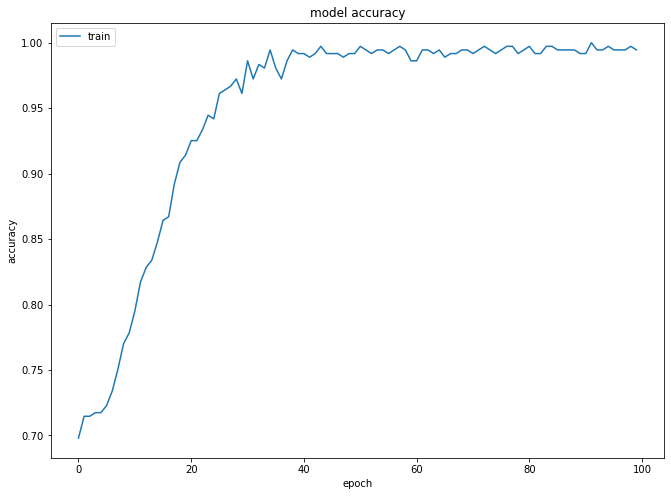

In [93]:
plt.figure(figsize=(11,8))
plt.plot(history.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [94]:
### Summarize history for loss

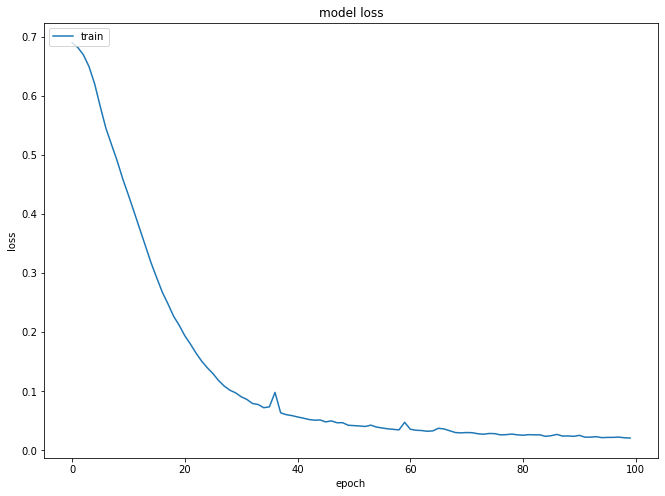

In [95]:
plt.figure(figsize=(11,8))
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()